# Milestones 2

---

# 1. Perkenalan

Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

**Info Dataset**

Dataset ini berisi tentang daftar harga rumah di setiap kota di negara USA (United State). Saya sebagai data analis akan melakukan prediksi harga rumah berdasarkan lokasi, kamar tidur, kondisi rumah, luas tanah, dll.

Objective :
- Mampu membuat Model Machine Learning untuk memprediksi harga rumah di setiap kota di USA.

# 2. Import Pustaka
Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

import warnings
warnings.filterwarnings('ignore')

# Split Dataset Train and Test
from sklearn.model_selection import train_test_split

# Handling Outliers and Missing Values
from feature_engine.outliers import Winsorizer
from feature_engine.outliers import OutlierTrimmer
from sklearn.impute import SimpleImputer

# Feature Scaling and Feature Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector,make_column_transformer

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Model Method
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Model Evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# 3. Data Loading

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

Sumber dataset : https://www.kaggle.com/shree1992/housedata

In [78]:
# Dataset
df = pd.read_csv('D:\Project\hacktiv8_project\dataset\milestone_dataset/house_price_pred.csv')
df_ori = df.copy()
pd.set_option('display.max_columns', None)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [79]:
df.shape

(4600, 18)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


# 4. Exploratory Data Analysis (EDA)

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [82]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [83]:
# date
df['date'] = pd.to_datetime(df['date'])

### 4.1. Price

<AxesSubplot:xlabel='price', ylabel='Density'>

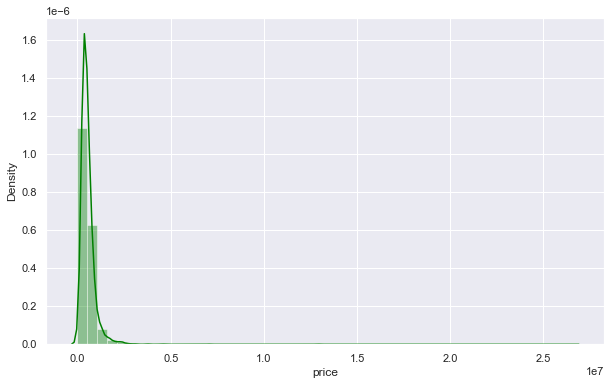

In [84]:
ax=plt.figure(figsize=(10,6))
sns.distplot(df['price'],color='green')

Distribusi data pada kolom price adalah skewed, data-data tersebut tersebar ke sebelah kiri.

Saya akan mengelompokkan kota-kota di negara USA yang memiliki harga rumah diatas 1.5 juta dollars.

In [85]:
city_price = df[(df['price'] > 1500000)].groupby('city').sum()[['price']]
city_price

,price
city,
Bellevue,4.919642e+07
Carnation,1.680000e+06
Clyde Hill,6.200000e+06
Covington,2.199900e+06
Fall City,3.150000e+06
Issaquah,4.438888e+06
Kent,2.659000e+07
Kirkland,1.361050e+07
Medina,1.968915e+07


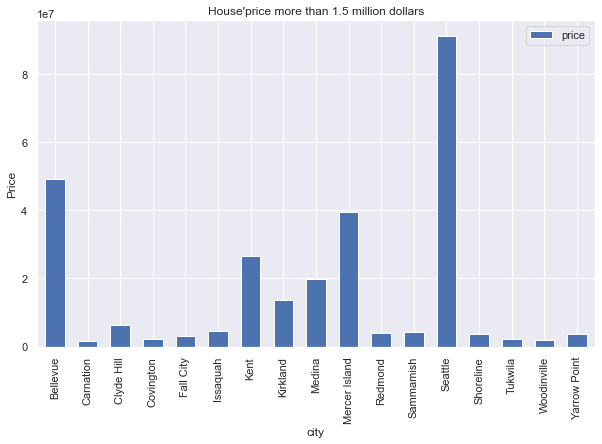

In [86]:
city_price.plot(kind='bar', figsize=(10,6), width=0.6)
plt.title("House'price more than 1.5 million dollars", fontsize=12)
plt.ylabel("Price")
plt.show()

Harga rumah yang paling mahal berada pada kota **Seattle**.

### 4.2. Date

In [87]:
df['date'].dt.year.value_counts()

2014    4600
Name: date, dtype: int64

In [88]:
df['date'].dt.month.value_counts()

6    2179
5    1768
7     653
Name: date, dtype: int64

<AxesSubplot:xlabel='date', ylabel='count'>

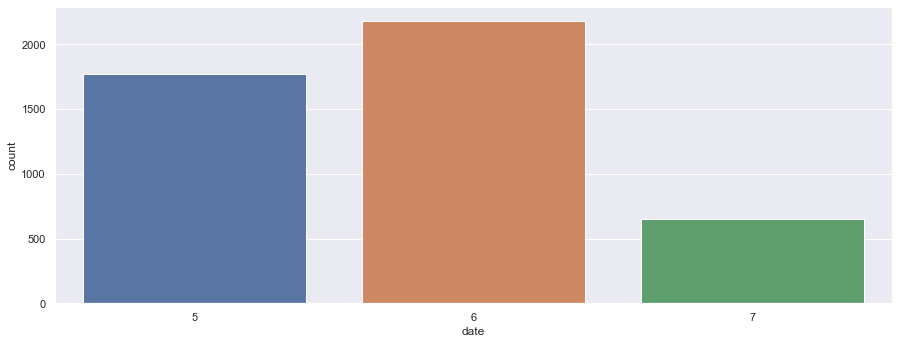

In [89]:
fig = plt.figure(figsize=(15, 12))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot(grid[0, :])
sns.countplot(x=df.date.dt.month, ax=ax1)

Dataset ini menunjukkan bahwa orang-orang membeli rumah di negara USA terjadi di tahun 2014 bulan ke 5 samapai bulan ke 7. Terdapat bulan ke 6, orang-orang banyak membeli rumah pada bulan tersebut sejumlah 2179 rumah.

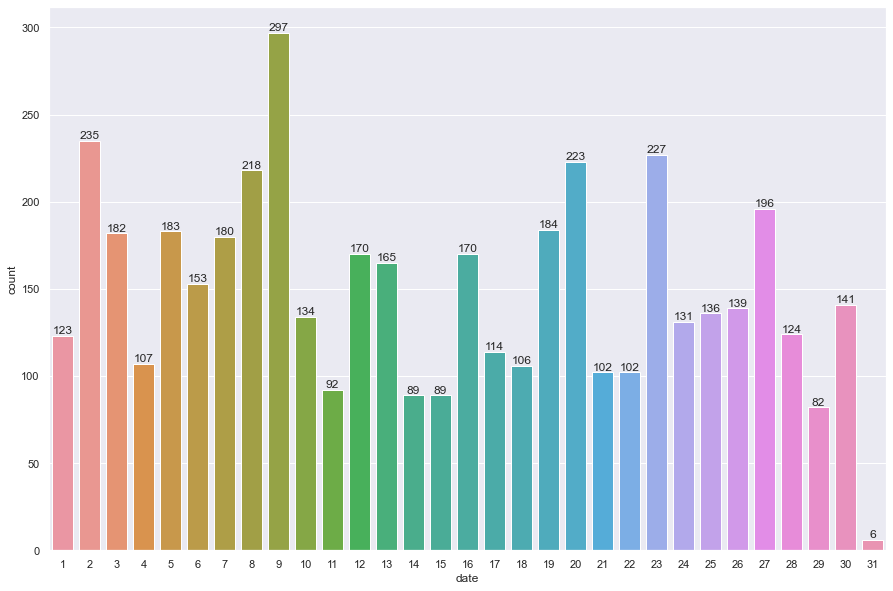

In [90]:
fig = plt.figure(figsize=(15,10))
ax = sns.countplot(df.date.dt.day)
ax.bar_label(ax.containers[0], fontsize=12)
plt.show()

Terlihat pada tanggal 9 dari bulan ke 5 sampai ke 7 di tahun 2014 paling banyak orang-orang beli rumah di negara USA.

### 4.3. Bedrooms

Jumlah kamar tidur disetiap rumah di negara USA. 

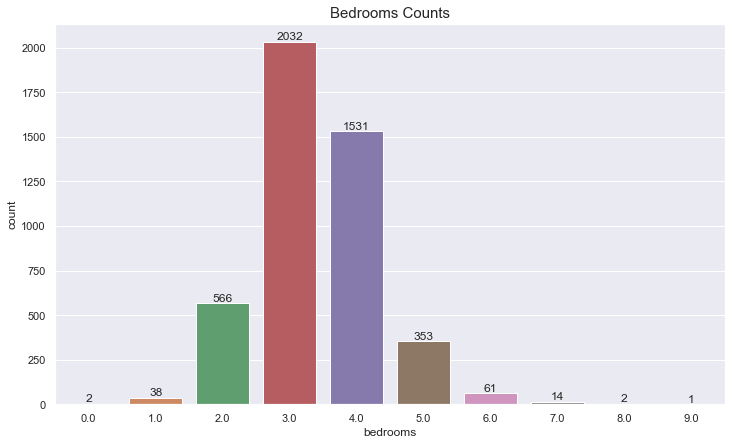

In [91]:
plt.figure(figsize=(12,7))
ax = sns.countplot(df.bedrooms)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Bedrooms Counts', fontsize=15)
plt.show()

Dominan rumah di USA memiliki 3 kamar tidur.

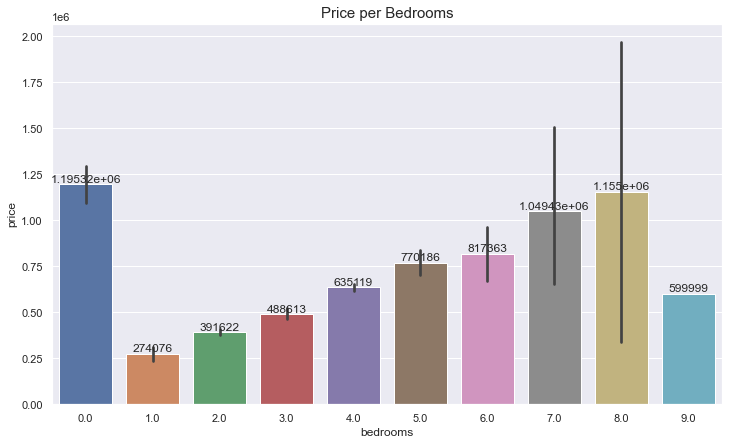

In [92]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=df.bedrooms, y=df.price)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Price per Bedrooms', fontsize=15)
plt.show()

Rumah yang tidak memiliki kamar tidur lebih besar biayanya dibanding dengan rumah yang memiliki kamar tidur.

### 4.4. Bathrooms

Jumlah kamar mandi disetiap rumah di negara USA.

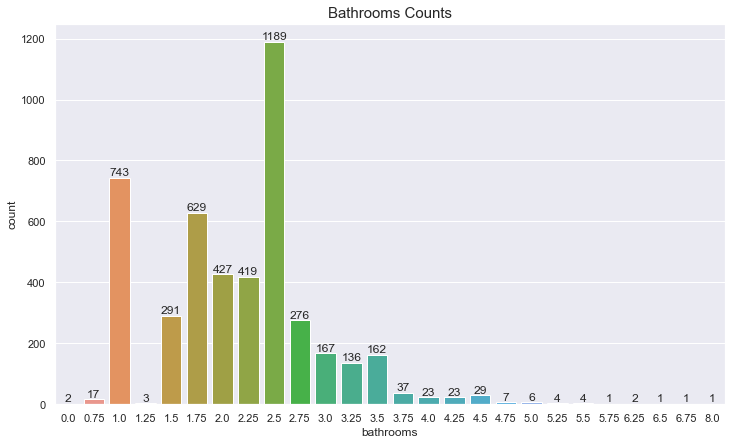

In [93]:
plt.figure(figsize=(12,7))
ax = sns.countplot(df.bathrooms)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Bathrooms Counts', fontsize=15)
plt.show()

Jumlah kamar mandi di rumah di negara USA paling banyak disekitar 2 kamar mandi per rumah.

### 4.5 Floors

Disini saya akan mengubah nilai dari lantai/tingkatan rumah karena rumah yang bertingkat tidak ada yang bernilai float (nilai berkoma).

In [94]:
mask_floors = {1: 1, 1.5 : 1, 2:2, 2.5:2, 3:3, 3.5:3}
new_df = df.copy()
new_df['floors'] = new_df['floors'].map(mask_floors)
new_df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3.0,1.5,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5.0,2.5,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3.0,2.0,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


In [95]:
new_df.floors.value_counts()

1    2618
2    1852
3     130
Name: floors, dtype: int64

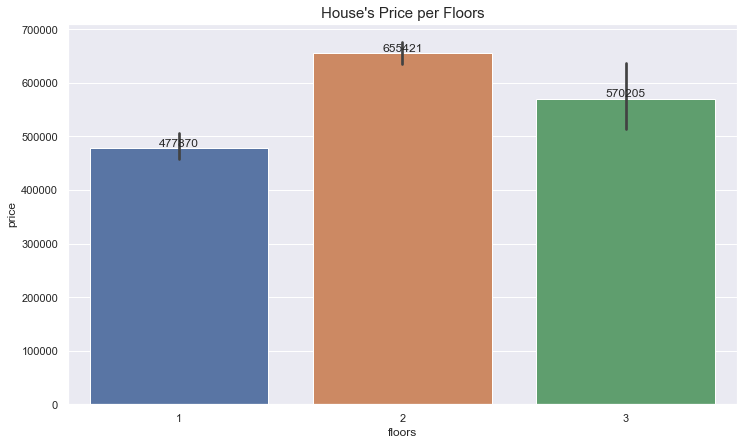

In [96]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=new_df.floors, y=new_df.price)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title("House's Price per Floors", fontsize=15)
plt.show()

Harga rumah bertingkat 2 lebih mahal dibanding dengan rumah bertingkat 3 maupun bertingkat 1.

### 4.6. Condition

Kondisi rumah di negara USA :
1. Buruk
2. Kurang Bagus
3. Cukup Bagus
4. Bagus
5. Sangat Bagus

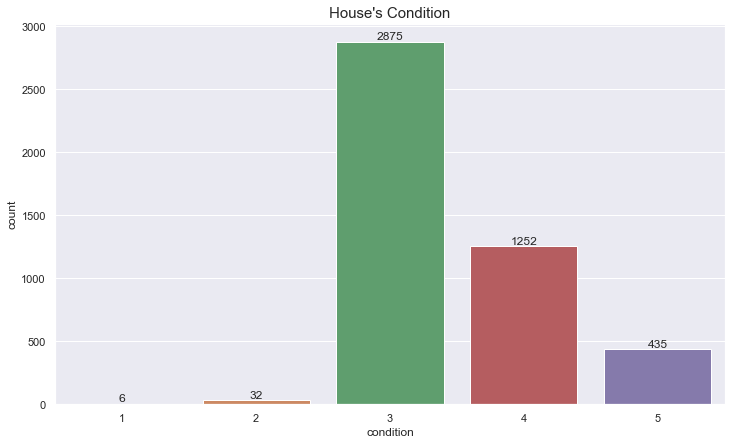

In [97]:
plt.figure(figsize=(12,7))
ax = sns.countplot(new_df.condition)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title("House's Condition", fontsize=15)
plt.show()

Kondisi rumah di negara USA kebanyakan cukup bagus untuk ditinggali oleh konsumen.

### 4.7. Renovasi

<AxesSubplot:xlabel='yr_renovated', ylabel='Count'>

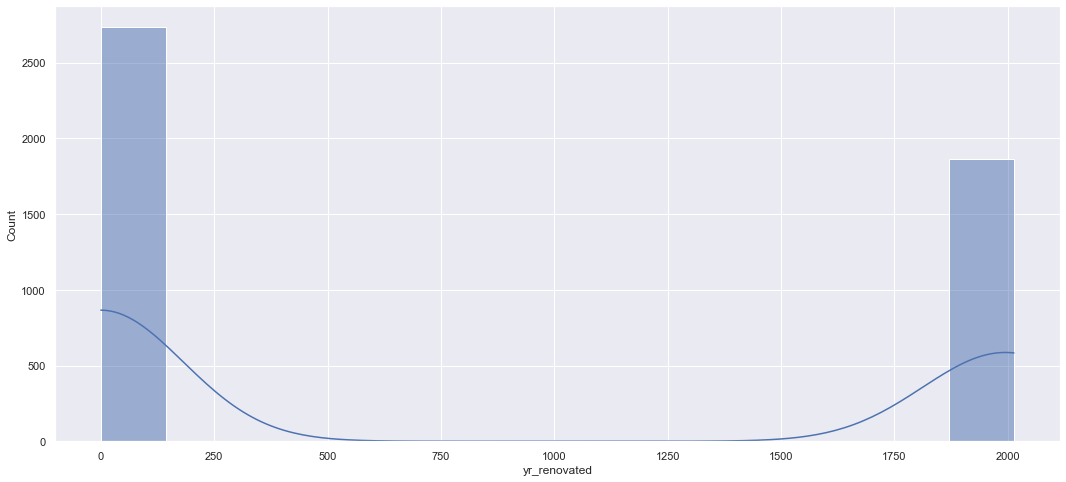

In [98]:
sns.histplot(new_df.yr_renovated, kde=True)

Jika rumah sudah pernah direnovasi bernilai 1, dan belum direnovasi bernilai 0.

In [99]:
new_df.yr_renovated = new_df.yr_renovated.apply(lambda x: 0 if x==0 else 1)
print(new_df.yr_renovated.value_counts())

0    2735
1    1865
Name: yr_renovated, dtype: int64


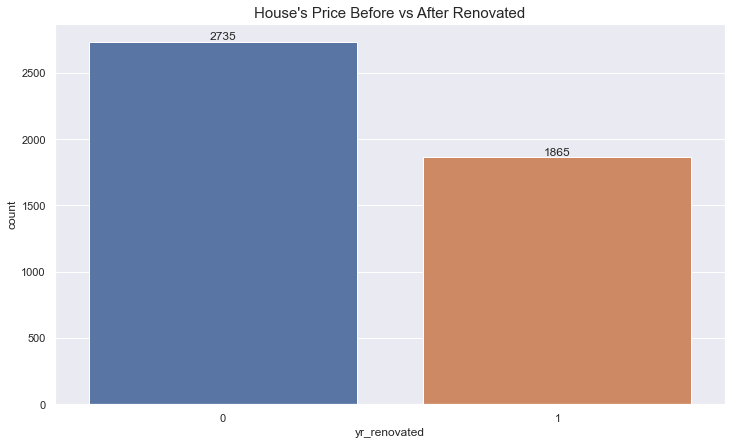

In [100]:
plt.figure(figsize=(12,7))
ax = sns.countplot(x=new_df.yr_renovated)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title("House's Price Before vs After Renovated", fontsize=15)
plt.show()

Rumah yang sudah direnovasi lebih sedikit dibanding dengan rumah yang masih utuh (belum pernah direnovasi). Biasanya rumah direnovasi dikarenakan keadaan rumah yang sebelumnya ditinggali oleh orang lain ada beberapa kerusakan atau umur rumah tersebut sudah terlalu lama sehingga terjadi kerusakan dari faktor alam.

### 4.8. City

Disini saya akan melihat 10 kota yang memiliki rumah paling banyak.

In [101]:
top_10_city = new_df['city'].value_counts().sort_values(ascending=False).head(10)
top_10_city

Seattle        1573
Renton          293
Bellevue        286
Redmond         235
Issaquah        187
Kirkland        187
Kent            185
Auburn          176
Sammamish       175
Federal Way     148
Name: city, dtype: int64

<AxesSubplot:ylabel='city'>

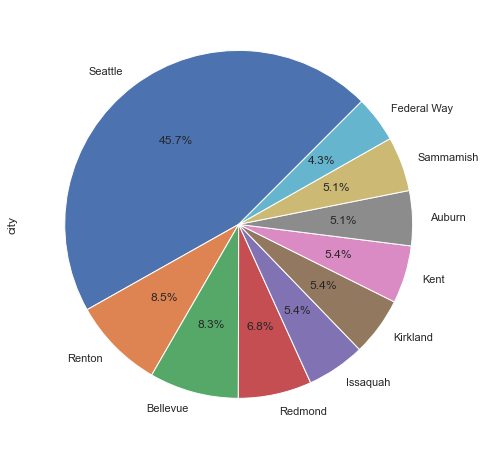

In [102]:
plt.figure(figsize=(12,8))
top_10_city.plot.pie(autopct='%1.1f%%', startangle=45)

Kota Seattle memiliki rumah paling banyak dibandingkan dengan kota-kota lain di negara USA.

### 4.9. Square footage

Ukuran luas rumah.

In [103]:
sqft_cols = new_df.columns[new_df.columns.str.contains('sqft')]
sqft_cols

Index(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement'], dtype='object')

In [104]:
def show_count_plots(df, cols):
    fig = plt.figure(figsize=(10,10))
    grid = GridSpec(ncols=2, nrows=2, figure=fig)
    for i, name in enumerate(cols):
        ax = fig.add_subplot(grid[i])
        sns.histplot(df[name], kde=True, ax=ax)

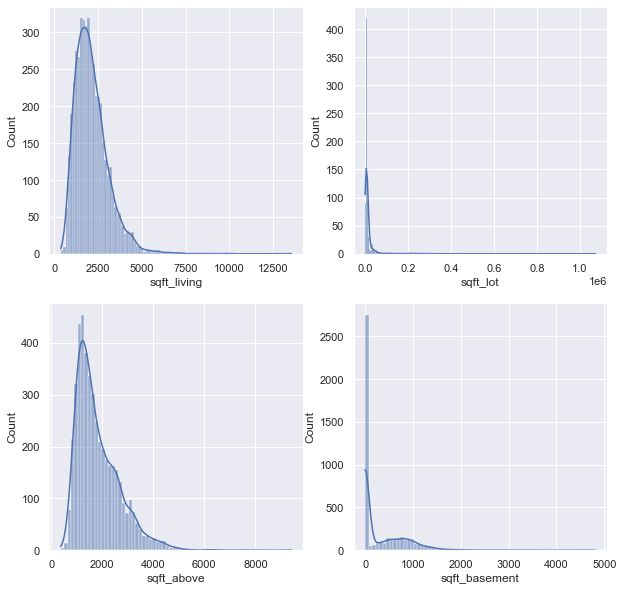

In [105]:
show_count_plots(new_df, sqft_cols)

Berikut ini adalah visualisasi persebaran data pada kolom sqft (Square footage) :
- sqft_living (luas ruang tamu) : Banyak Rumah yang memiliki ukuran luas ruang tamu diantara 0 - 5000 meter persegi. Maksimal luas ruang tamu pada rumah di USA adalah sekitar 12500 meter persegi.
- sqft_lot (luas halaman rumah) : Beberapa rumah tidak memiliki halaman rumah (sisa luas tanah selain luas rumah), sehingga di grafik menunjukkan sqft_lot dominan bernilai 0.
- sqft_above (luas tanah keseluruhan) : Kebanyakan rumah memiliki luas tanah disekitar 500 - 5000 meter persegi. Maksimal luas tanah pada rumah di USA adalah sekitar 10000 meter persegi.
- sqft_basement (luas ruang bawah tanah) : Tidak semua rumah di USA memiliki ruangan bawah tanah, inilah alasan kenapa nilai sqrt_basement lebih banyak bernilai 0.

### 4.9. Korelasi antar kolom

<AxesSubplot:>

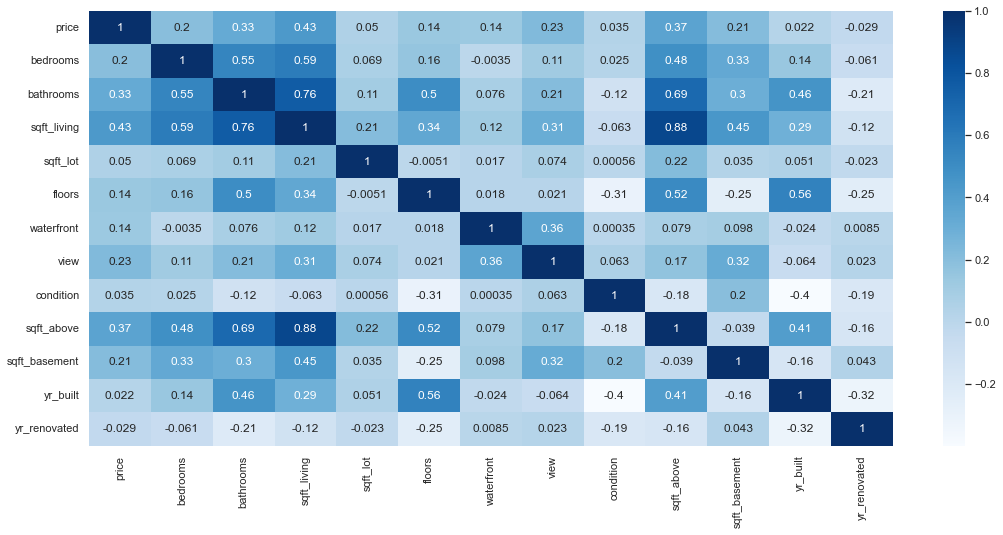

In [106]:
sns.set(rc={'figure.figsize':(18,8)})
sns.heatmap(new_df.corr(), annot=True, cmap='Blues')

Analisis korelasi :
- Kolom price dipengaruhi oleh beberapa kolom yang akan dijadikan feature nantinya seperti, `bedrooms`, `bathroom`, dan `sqft` (Square footage = luas tanah).
- Di dunia nyata, biasanya penentuan harga rumah bisa dilihat dari luas tanah rumah, jumlah tingkat (floors), biaya rumah setelah direnovasi (yr_renovated) dan kondisi rumah.

# 5. Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test-inference, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.



Kita akan membagi dataset menjadi dua, yaitu : Dataset Train-test sebagai membuat model dan Data Inference sebagai data diluar dari dataset yang digunakan untuk menguji model atau disebut juga sebagai data prediksi. Data Inference diambil 100 baris dari data original.

In [107]:
df_inf = new_df.sample(100, random_state=17)
df_inf

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1567,2014-05-29,3100000.0,6.0,4.25,6980,15682,3,0,4,4,5330,1650,1999,0,5243 Forest Ave SE,Mercer Island,WA 98040,USA
1490,2014-05-28,425000.0,4.0,2.75,1680,9545,1,0,0,4,1080,600,1979,0,7220 NE 152nd Pl,Kenmore,WA 98028,USA
580,2014-05-13,591000.0,4.0,2.25,2710,38180,2,0,0,4,2710,0,1977,0,19615 182nd Ave NE,Woodinville,WA 98077,USA
4207,2014-07-09,215000.0,4.0,1.50,1860,5040,1,0,0,5,1860,0,1920,0,1730 Washington Ave,Enumclaw,WA 98022,USA
1992,2014-06-05,453500.0,4.0,1.75,2000,6032,1,0,2,3,1300,700,1959,1,4404 SW 101st St,Seattle,WA 98146,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2014-05-07,560000.0,3.0,3.00,4120,60392,2,0,2,3,3180,940,1994,0,32223 NE 88th St,Carnation,WA 98014,USA
3528,2014-06-27,140000.0,3.0,1.00,1060,7473,1,0,0,3,1060,0,1959,1,25826 19th Ave S,Des Moines,WA 98198,USA
563,2014-05-13,415000.0,3.0,1.75,1960,5000,1,0,0,5,980,980,1911,1,4958 12th Ave S,Seattle,WA 98108,USA
3268,2014-06-24,415000.0,3.0,2.50,2280,6031,2,0,0,3,2280,0,2011,0,27927 NE 147th Cir,Duvall,WA 98019,USA


In [108]:
df_train_test = new_df.drop(df_inf.index)

# reset index
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

### 5.1. Split Dataset

Definisikan variabel X sebagai data yang akan digunakan sebagai alat prediksi dan variabel y sebagai data yang akan diprediksi. 

Label yang akan diprediksi adalah kolom price yang mana disini saya memprediksikan harga rumah di negara USA.

In [109]:
# Split X dan y

X = df_train_test.drop(['price'], axis=1) # Features = alat/kolom untuk membuat prediksi
y = df_train_test['price'] # target = sesuatu yang akan diprediksi

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17) 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3600, 17)
(900, 17)
(3600,)
(900,)


### 5.2. Outliers

Mengecek outliers pada data Train

In [111]:
# Buat fungsi untuk mencetak histogram dan boxplot
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Outliers sebelum di handling


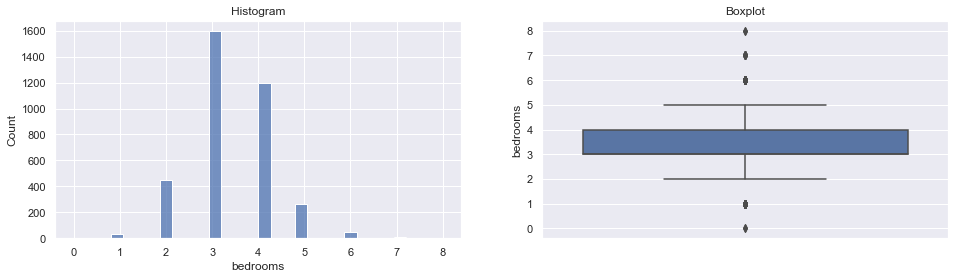

Skewness : 0.4059595526719426


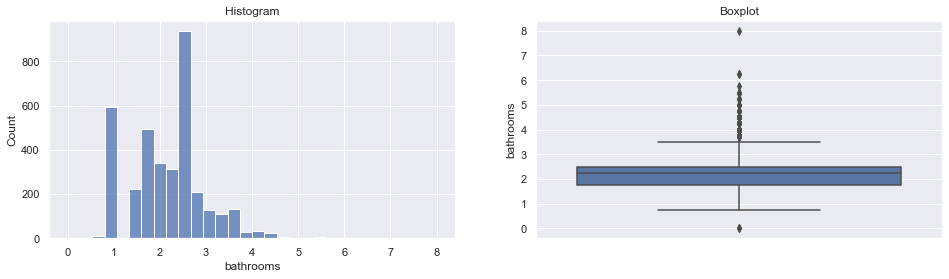

Skewness : 0.5871564089523618


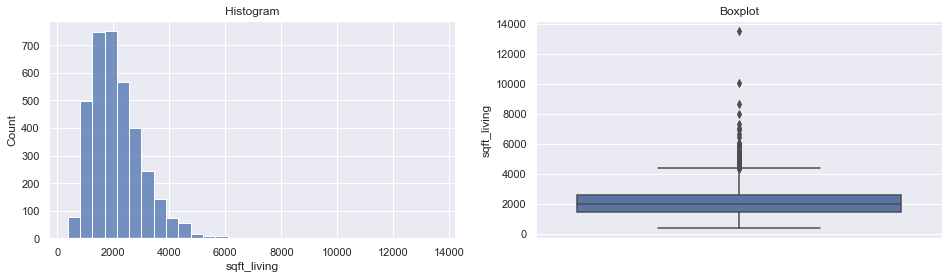

Skewness : 1.7103698168221244


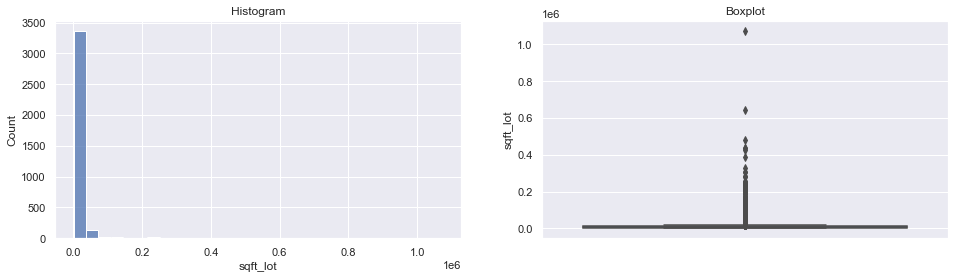

Skewness : 11.686138046840936


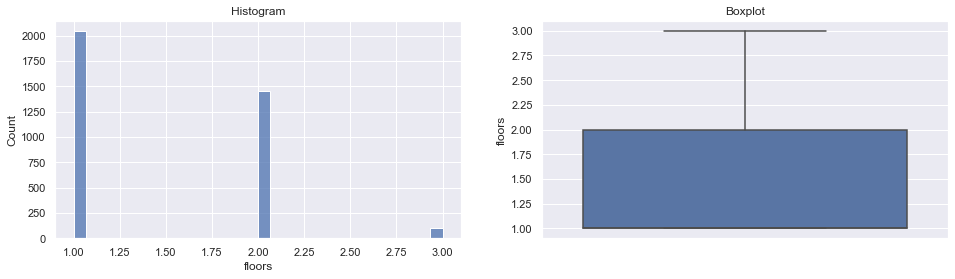

Skewness : 0.6665705515367889


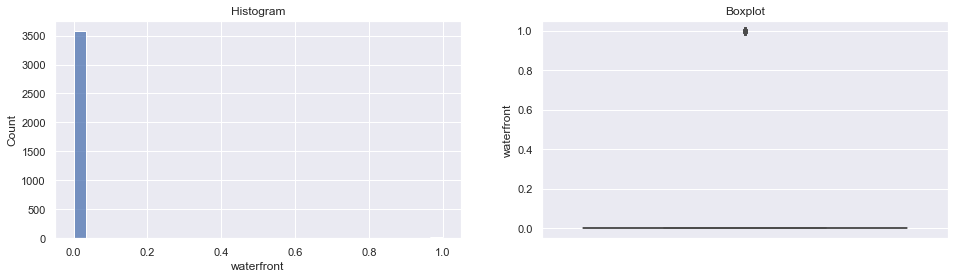

Skewness : 11.879586943001772


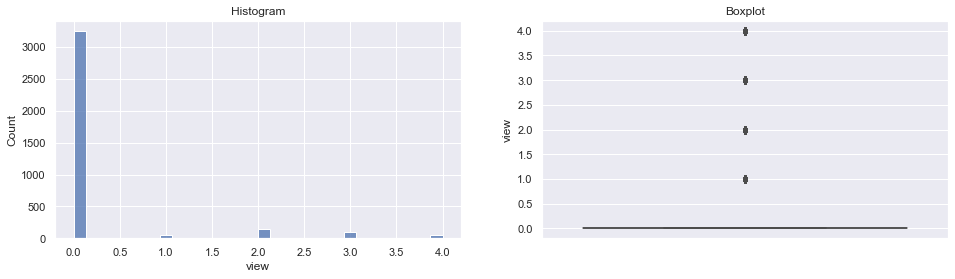

Skewness : 3.3672085017567617


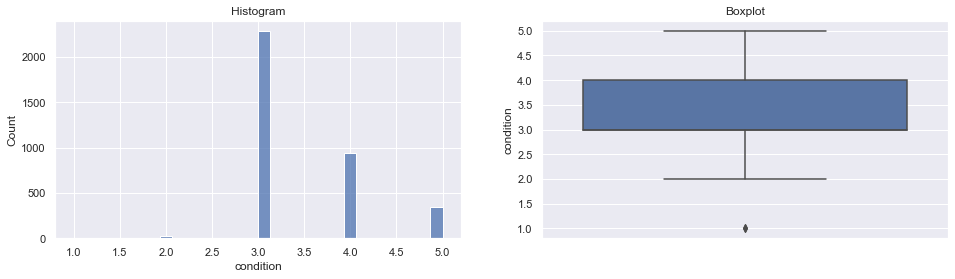

Skewness : 1.032510418764518


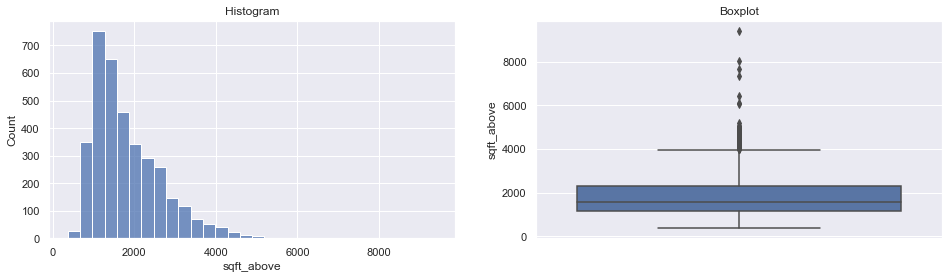

Skewness : 1.5052807451297452


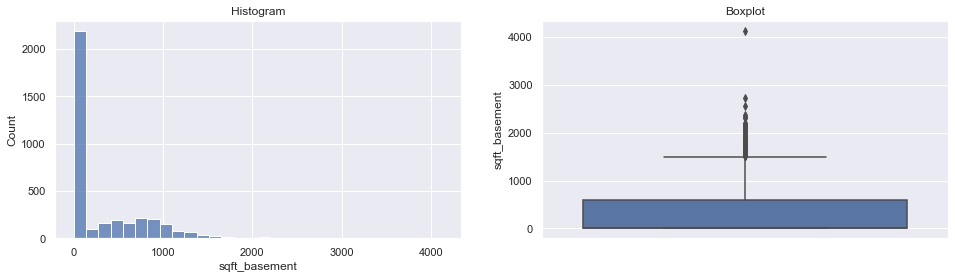

Skewness : 1.5202597595796181


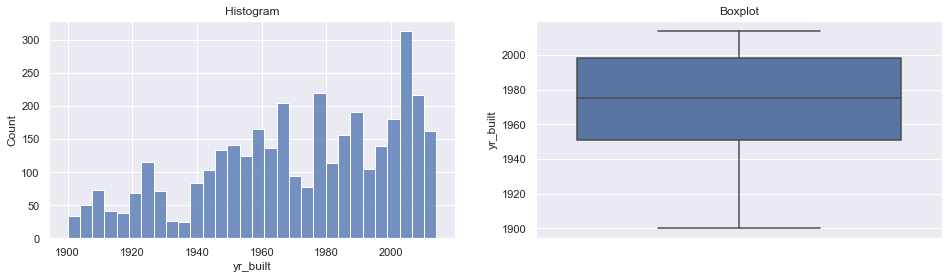

Skewness : -0.48398492813727456


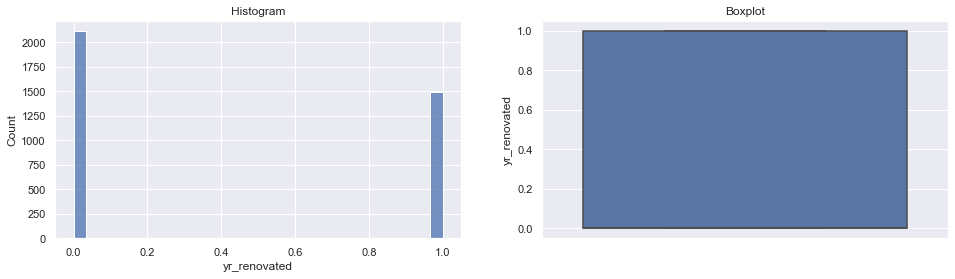

Skewness : 0.35214147729899903


In [112]:
print('Outliers sebelum di handling')
for cols in X_train.describe().columns:
    diagnostic_plots(X_train, cols)
    print('Skewness :', X_train[cols].skew())

In [113]:
# cek semua distribusi dataset

distribusi_data = pd.DataFrame({'column':X_train.describe().columns, 'skew' : X_train.skew(axis=0)})
distribusi_data.reset_index(drop=True, inplace=True)
distribusi_data['distribution'] = np.where((distribusi_data['skew'] < 0.5) & (distribusi_data['skew'] > - 0.5) , 'Normal', 'Skew')
distribusi_data

,column,skew,distribution
0,bedrooms,0.405960,Normal
1,bathrooms,0.587156,Skew
2,sqft_living,1.710370,Skew
3,sqft_lot,11.686138,Skew
4,floors,0.666571,Skew
5,waterfront,11.879587,Skew
6,view,3.367209,Skew
7,condition,1.032510,Skew
8,sqft_above,1.505281,Skew
9,sqft_basement,1.520260,Skew


In [114]:
# pakai fungsi ini kalau distribusi datanya normal
def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [115]:
# pakai fungsi ini kalau distribusi datanya skewed

def find_skewed_boundaries(df, variable):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower = df[variable].quantile(0.25) - (1.5 * IQR)
    upper = df[variable].quantile(0.75) + (1.5 * IQR)

    return upper, lower

In [116]:
X_train_outliers = {
    'column' : [],
    'upper_boundary' : [],
    'lower_boundary' : [],
    'total_right_tail' : [],
    'total_left_tail' : [],
    'total_right_tail_percent' : [],
    'total_left_tail_percent' : [],
    'total_outlier' : [],
    'total_outlier_percent' :[]
}

for row in distribusi_data.index.tolist():
    col = distribusi_data.iloc[row]['column']
    dist = distribusi_data.iloc[row]['distribution']
    if dist == 'Normal' :
        upper_boundary, lower_boundary = find_normal_boundaries(X_train, col)
    else:
        upper_boundary, lower_boundary = find_skewed_boundaries(X_train, col)


    total_right_tail = len(X_train[X_train[col] > upper_boundary])
    total_left_tail = len(X_train[X_train[col] < lower_boundary])
    total_right_tail_percent = total_right_tail/len(X_train)*100
    total_left_tail_percent = total_left_tail/len(X_train)*100
    total_outlier = total_left_tail + total_right_tail
    total_outlier_percent = total_left_tail_percent + total_right_tail_percent

    X_train_outliers['column'].append(col)
    X_train_outliers['upper_boundary'].append(upper_boundary)
    X_train_outliers['lower_boundary'].append(lower_boundary)
    X_train_outliers['total_right_tail'].append(total_right_tail)
    X_train_outliers['total_left_tail'].append(total_left_tail)
    X_train_outliers['total_right_tail_percent'].append(total_right_tail_percent)
    X_train_outliers['total_left_tail_percent'].append(total_left_tail_percent)
    X_train_outliers['total_outlier'].append(total_outlier)
    X_train_outliers['total_outlier_percent'].append(total_outlier_percent)

X_train_outliers = pd.DataFrame(X_train_outliers)
X_train_outliers

,column,upper_boundary,lower_boundary,total_right_tail,total_left_tail,total_right_tail_percent,total_left_tail_percent,total_outlier,total_outlier_percent
0,bedrooms,6.105354,0.674646,13,2,0.361111,0.055556,15,0.416667
1,bathrooms,3.625000,0.625000,107,2,2.972222,0.055556,109,3.027778
2,sqft_living,4360.000000,-280.000000,94,0,2.611111,0.000000,94,2.611111
3,sqft_lot,19601.875000,-3761.125000,426,0,11.833333,0.000000,426,11.833333
4,floors,3.500000,-0.500000,0,0,0.000000,0.000000,0,0.000000
5,waterfront,0.000000,0.000000,25,0,0.694444,0.000000,25,0.694444
6,view,0.000000,0.000000,354,0,9.833333,0.000000,354,9.833333
7,condition,5.500000,1.500000,0,2,0.000000,0.055556,2,0.055556
8,sqft_above,3980.000000,-500.000000,91,0,2.527778,0.000000,91,2.527778
9,sqft_basement,1500.000000,-900.000000,63,0,1.750000,0.000000,63,1.750000


In [117]:
# Merge Distribusi data dan X_train_outlier

pd.merge(distribusi_data, X_train_outliers, on='column')

,column,skew,distribution,upper_boundary,lower_boundary,total_right_tail,total_left_tail,total_right_tail_percent,total_left_tail_percent,total_outlier,total_outlier_percent
0,bedrooms,0.405960,Normal,6.105354,0.674646,13,2,0.361111,0.055556,15,0.416667
1,bathrooms,0.587156,Skew,3.625000,0.625000,107,2,2.972222,0.055556,109,3.027778
2,sqft_living,1.710370,Skew,4360.000000,-280.000000,94,0,2.611111,0.000000,94,2.611111
3,sqft_lot,11.686138,Skew,19601.875000,-3761.125000,426,0,11.833333,0.000000,426,11.833333
4,floors,0.666571,Skew,3.500000,-0.500000,0,0,0.000000,0.000000,0,0.000000
5,waterfront,11.879587,Skew,0.000000,0.000000,25,0,0.694444,0.000000,25,0.694444
6,view,3.367209,Skew,0.000000,0.000000,354,0,9.833333,0.000000,354,9.833333
7,condition,1.032510,Skew,5.500000,1.500000,0,2,0.000000,0.055556,2,0.055556
8,sqft_above,1.505281,Skew,3980.000000,-500.000000,91,0,2.527778,0.000000,91,2.527778
9,sqft_basement,1.520260,Skew,1500.000000,-900.000000,63,0,1.750000,0.000000,63,1.750000


#### Handling Outliers

Kolom yang memiliki : 
- persentase outlier  < 5% : Trimming
- 5% <= persentase outlier < 15% : Capping
- persentase outlier => 15% : Biarkan

In [118]:
# Handling Outliers

print('X_train - Before Handling', X_train.shape)
outlier_trimmer = OutlierTrimmer(capping_method='gaussian',
                        tail='both',
                        fold=3,
                        variables=['bedrooms'],
                        missing_values='ignore')

outlier_trimmer.fit(X_train)
X_train_clean_outliers = outlier_trimmer.transform(X_train)
print('X_train = After Handling', X_train_clean_outliers.shape)

X_train - Before Handling (3600, 17)
X_train = After Handling (3585, 17)


In [119]:
print('X_train - Before Handling', X_train_clean_outliers.shape)
outlier_trimmer = OutlierTrimmer(capping_method='iqr',
                        tail='both',
                        fold=1.5,
                        variables=['bathrooms','sqft_living','waterfront','condition', 'sqft_above', 'sqft_basement'],
                        missing_values='ignore')

outlier_trimmer.fit(X_train_clean_outliers)
X_train_clean_outliers = outlier_trimmer.transform(X_train_clean_outliers)
print('X_train = After Handling', X_train_clean_outliers.shape)

X_train - Before Handling (3585, 17)
X_train = After Handling (3360, 17)


In [120]:
print('X_train - Before Handling', X_train_clean_outliers.shape)
winsorizer = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=['sqft_lot', 'view'],
                            missing_values='ignore')

winsorizer.fit(X_train_clean_outliers)
X_train_clean_outliers = winsorizer.transform(X_train_clean_outliers)
print('X_train - After Handling', X_train_clean_outliers.shape)

X_train - Before Handling (3360, 17)
X_train - After Handling (3360, 17)


In [121]:
y_train.drop(y_train.index.difference(X_train_clean_outliers.index), inplace=True)
y_train.shape

(3360,)

### 5.3. Missing Values

Cek missing values di kedua dataset

In [122]:
X_train_clean_outliers.isna().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [123]:
X_test.isna().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [124]:
y_train.isna().sum()

0

In [125]:
y_test.isna().sum()

0

### 5.4. Features Selection

Analisis feature selection :
- Kolom date, street, dan statezip saya buang karena kolom tersebut tidak bisa dijadikan patokan/feature untuk memprediksi harga.
- Kolom waterfront dan view juga saya tidak digunakan untuk feature.
- Kolom Country saya buang karena nilai country hanya terdapat USA saja.

In [126]:
X_train_ = X_train_clean_outliers.copy()
X_test_ = X_test.copy()

X_train_.drop(['date','street','statezip','country','view','waterfront'], axis=1, inplace=True)
X_test_.drop(['date','street','statezip','country','view','waterfront'], axis=1, inplace=True)

X_train = X_train_
X_test = X_test_

In [127]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
4465,4.0,2.50,2590,8483.00,2,3,2590,0,1991,0,Bothell
70,3.0,1.00,1330,18273.75,1,3,1330,0,1928,1,Kirkland
1080,4.0,2.50,2360,5226.00,2,3,2360,0,2001,0,Kirkland
1378,3.0,2.50,1590,2550.00,3,3,1590,0,1985,0,Seattle
1740,3.0,2.00,2140,4923.00,1,4,1070,1070,1928,0,Seattle
...,...,...,...,...,...,...,...,...,...,...,...
2800,4.0,2.50,2610,8031.00,2,3,2610,0,1998,1,Lake Forest Park
1337,4.0,2.50,2520,8515.00,2,3,2520,0,1999,0,Duvall
406,3.0,2.00,1920,8075.00,1,4,1510,410,1969,0,Federal Way
2191,5.0,3.25,2750,7500.00,2,3,2150,600,1937,1,Kirkland


### 5.5. Feature Scaling dan Feature Encoding

Feature Scaling untuk data numerik dan Feature Encoding untuk data kategorik. Ini berguna untuk memudahkan Machine Learning mempelajari data dan membuat model baru.

In [128]:
# split columns
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train.select_dtypes(exclude=np.number).columns.tolist()

print('Numerical Columns :',num_cols)
print('\nCategorical Columns :',cat_cols)

# num_cols = make_column_selector(dtype_include='number')
# cat_cols = make_column_selector(dtype_exclude='number')

Numerical Columns : ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

Categorical Columns : ['city']


In [129]:
# Feature Scaling
scaler = StandardScaler()

In [130]:
# Feature Encoding
ohe = OneHotEncoder(handle_unknown='ignore')

In [131]:
# Make Pipeline for preprocessing

num_pipe = Pipeline([
    ('scaler', scaler)
    ])

cat_pipe = Pipeline(
    [('encoder', ohe)]
)

preprocessing = ColumnTransformer(
    [('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)]
)

# 6. Model Definition

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

Dipakai 2 model algoritma :
1. Linear Regression
2. Random Forest Regressor

### 6.1. Linear Regression

In [132]:
# Baseline Model
lr = LinearRegression(fit_intercept=True)

# Using Pipeline
pipe_base_lr = Pipeline([
    ('preprocessing', preprocessing),
    ('regression', lr)
])

### 6.2. Random Forest Regressor

In [133]:
# Baseline Model
rfr = RandomForestRegressor()

# Using Pipeline
pipe_base_rfr = Pipeline([
    ('preprocessing', preprocessing),
    ('regression', rfr)
])

In [134]:
# Make Hyperparameter Tuning
param_rfr = {
    'regression__n_estimators':[10,15,20],
    'regression__criterion':['squared_error', 'absolute_error'],
    'regression__max_depth': np.arange(2,5),
    'regression__min_samples_split': np.arange(2,5),
    'regression__min_samples_leaf': np.arange(2,5)
}

# 7. Model Training

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

### 7.1 Linear Regression

In [135]:
pipe_base_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'condition',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['city'

### 7.2. Random Forest Regressor

In [136]:
# Baseline Model Training
pipe_base_rfr.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'condition',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['city'

In [137]:
# with Hyperparameter Tuning
grid_rf = GridSearchCV(estimator=pipe_base_rfr, param_grid=param_rfr, cv=5, n_jobs=-1)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['bedrooms',
                                                                          'bathrooms',
                                                                          'sqft_living',
                                                                          'sqft_lot',
                                                                          'floors',
                                                                          'condition',
                                                                          'sqft_above',
                          

# 8. Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.



### 8.1. Model Evaluation Linear Regression

In [138]:
y_pred_lr_train = pipe_base_lr.predict(X_train)
y_pred_lr_test = pipe_base_lr.predict(X_test)

# Train
mae_model1_train = mean_absolute_error(y_train, y_pred_lr_train)
mse_model1_train = mean_squared_error(y_train, y_pred_lr_train)
rmse_model1_train = mean_squared_error(y_train, y_pred_lr_train, squared=False)
r2_model1_train = r2_score(y_train, y_pred_lr_train)
print("======== Error Train-set ========")
print('Mean Absolute Error :', mae_model1_train)
print('Mean Squared Error :', mse_model1_train)
print('R Mean Squared Error :', rmse_model1_train)
print('R2 Score :', r2_model1_train)

print(' ')

# Test
mae_model1_test = mean_absolute_error(y_test, y_pred_lr_test)
mse_model1_test = mean_squared_error(y_test, y_pred_lr_test)
rmse_model1_test = mean_squared_error(y_test, y_pred_lr_test, squared=False)
r2_model1_test = r2_score(y_test, y_pred_lr_test)
print("======== Error Test-set ========")
print('Mean Absolute Error :', mae_model1_test)
print('Mean Squared Error :', mse_model1_test)
print('R Mean Squared Error :', rmse_model1_test)
print('R2 Score :', r2_model1_test)

======== Error Train-set ========
Mean Absolute Error : 122889.23551244935
Mean Squared Error : 280062693947.8822
R Mean Squared Error : 529209.4991096458
R2 Score : 0.12198226904570475
 
======== Error Test-set ========
Mean Absolute Error : 132250.69917350146
Mean Squared Error : 53544154571.54191
R Mean Squared Error : 231396.09886845955
R2 Score : 0.6391450123693915


### 8.2. Model Evaluation Random Forest Regressor

In [139]:
y_pred_rfr_train = pipe_base_rfr.predict(X_train)
y_pred_rfr_test = pipe_base_rfr.predict(X_test)

# Train
mae_model1_train = mean_absolute_error(y_train, y_pred_rfr_train)
mse_model1_train = mean_squared_error(y_train, y_pred_rfr_train)
rmse_model1_train = mean_squared_error(y_train, y_pred_rfr_train, squared=False)
r2_model1_train = r2_score(y_train, y_pred_rfr_train)
print("======== Error Train-set ========")
print('Mean Absolute Error :', mae_model1_train)
print('Mean Squared Error :', mse_model1_train)
print('R Mean Squared Error :', rmse_model1_train)
print('R2 Score :', r2_model1_train)

print(' ')

# Test
mae_model1_test = mean_absolute_error(y_test, y_pred_rfr_test)
mse_model1_test = mean_squared_error(y_test, y_pred_rfr_test)
rmse_model1_test = mean_squared_error(y_test, y_pred_rfr_test, squared=False)
r2_model1_test = r2_score(y_test, y_pred_rfr_test)
print("======== Error Test-set ========")
print('Mean Absolute Error :', mae_model1_test)
print('Mean Squared Error :', mse_model1_test)
print('R Mean Squared Error :', rmse_model1_test)
print('R2 Score :', r2_model1_test)

======== Error Train-set ========
Mean Absolute Error : 47200.86289720194
Mean Squared Error : 53358687971.67396
R Mean Squared Error : 230994.9955554751
R2 Score : 0.8327164768746177
 
======== Error Test-set ========
Mean Absolute Error : 129227.12456906553
Mean Squared Error : 66280187495.643074
R Mean Squared Error : 257449.38822153583
R2 Score : 0.5533119080825568


### 8.3. Model Evaluation Random Forest Regressor - with Hyperparamater Tuning

In [140]:
grid_rf.best_params_

{'regression__criterion': 'absolute_error',
 'regression__max_depth': 4,
 'regression__min_samples_leaf': 4,
 'regression__min_samples_split': 3,
 'regression__n_estimators': 20}

In [141]:
best_rf = grid_rf.best_estimator_
print(best_rf)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'condition',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['city'

In [142]:
y_pred_rfr2_train = best_rf.predict(X_train)
y_pred_rfr2_test = best_rf.predict(X_test)

# Train
mae_model1_train = mean_absolute_error(y_train, y_pred_rfr2_train)
mse_model1_train = mean_squared_error(y_train, y_pred_rfr2_train)
rmse_model1_train = mean_squared_error(y_train, y_pred_rfr2_train, squared=False)
r2_model1_train = r2_score(y_train, y_pred_rfr2_train)
print("======== Error Train-set ========")
print('Mean Absolute Error :', mae_model1_train)
print('Mean Squared Error :', mse_model1_train)
print('R Mean Squared Error :', rmse_model1_train)
print('R2 Score :', r2_model1_train)

print(' ')

# Test
mae_model1_test = mean_absolute_error(y_test, y_pred_rfr2_test)
mse_model1_test = mean_squared_error(y_test, y_pred_rfr2_test)
rmse_model1_test = mean_squared_error(y_test, y_pred_rfr2_test, squared=False)
r2_model1_test = r2_score(y_test, y_pred_rfr2_test)
print("======== Error Test-set ========")
print('Mean Absolute Error :', mae_model1_test)
print('Mean Squared Error :', mse_model1_test)
print('R Mean Squared Error :', rmse_model1_test)
print('R2 Score :', r2_model1_test)

======== Error Train-set ========
Mean Absolute Error : 136972.2471804416
Mean Squared Error : 287275687946.5117
R Mean Squared Error : 535981.051853992
R2 Score : 0.09936898723087573
 
======== Error Test-set ========
Mean Absolute Error : 163539.094315356
Mean Squared Error : 91258283893.3603
R Mean Squared Error : 302089.8606265366
R2 Score : 0.384974752724333


Analisis Model :
- Setelah melakukan modeling pada dataset harga rumah, nilai error pada train maupun test terlihat tidak masuk akal. Jadi saya putuskan hanya mengecek R2_score tertinggi.
- Model algoritma baik Random Forest Regressor tanpa hyperparamter mendapatkan hasil model yang overfitting. Saya melihat pada R2_score train lebih besar dibanding dengan test.
- Model algoritma baik Random Forest Regressor tanpa hyperparamter mendapatkan hasil model yang tidak overfitting. Saya melihat pada R2_score test lebih besar dibanding dengan train meski akurasinya masih terbilang kecil.
- Model algoritma yang saya pakai adalah **Linear Regression** karena mempunyai r2_score yang cukup tinggi yaitu 63%.

# 9. Model Inference

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [143]:
# inference-set
df_inf

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-29,3100000.0,6.0,4.25,6980,15682,3,0,4,4,5330,1650,1999,0,5243 Forest Ave SE,Mercer Island,WA 98040,USA
1,2014-05-28,425000.0,4.0,2.75,1680,9545,1,0,0,4,1080,600,1979,0,7220 NE 152nd Pl,Kenmore,WA 98028,USA
2,2014-05-13,591000.0,4.0,2.25,2710,38180,2,0,0,4,2710,0,1977,0,19615 182nd Ave NE,Woodinville,WA 98077,USA
3,2014-07-09,215000.0,4.0,1.50,1860,5040,1,0,0,5,1860,0,1920,0,1730 Washington Ave,Enumclaw,WA 98022,USA
4,2014-06-05,453500.0,4.0,1.75,2000,6032,1,0,2,3,1300,700,1959,1,4404 SW 101st St,Seattle,WA 98146,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2014-05-07,560000.0,3.0,3.00,4120,60392,2,0,2,3,3180,940,1994,0,32223 NE 88th St,Carnation,WA 98014,USA
96,2014-06-27,140000.0,3.0,1.00,1060,7473,1,0,0,3,1060,0,1959,1,25826 19th Ave S,Des Moines,WA 98198,USA
97,2014-05-13,415000.0,3.0,1.75,1960,5000,1,0,0,5,980,980,1911,1,4958 12th Ave S,Seattle,WA 98108,USA
98,2014-06-24,415000.0,3.0,2.50,2280,6031,2,0,0,3,2280,0,2011,0,27927 NE 147th Cir,Duvall,WA 98019,USA


In [144]:
df_inf.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [145]:
# Split data feature dan data label

X_inf = df_inf.drop(['price'], axis=1)
y_inf = df_inf['price']

In [146]:
# predict
y_pred_inf = pipe_base_lr.predict(X_inf)
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['price - prediction'])
y_pred_inf

,price - prediction
0,1.718402e+06
1,3.806082e+05
2,6.169883e+05
3,3.455708e+05
4,5.342455e+05
...,...
95,8.317480e+05
96,1.087249e+05
97,6.352692e+05
98,4.439356e+05


In [147]:
df_inf_all = pd.concat([X_inf, y_inf, y_pred_inf], axis=1)
df_inf_all

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price,price - prediction
0,2014-05-29,6.0,4.25,6980,15682,3,0,4,4,5330,1650,1999,0,5243 Forest Ave SE,Mercer Island,WA 98040,USA,3100000.0,1.718402e+06
1,2014-05-28,4.0,2.75,1680,9545,1,0,0,4,1080,600,1979,0,7220 NE 152nd Pl,Kenmore,WA 98028,USA,425000.0,3.806082e+05
2,2014-05-13,4.0,2.25,2710,38180,2,0,0,4,2710,0,1977,0,19615 182nd Ave NE,Woodinville,WA 98077,USA,591000.0,6.169883e+05
3,2014-07-09,4.0,1.50,1860,5040,1,0,0,5,1860,0,1920,0,1730 Washington Ave,Enumclaw,WA 98022,USA,215000.0,3.455708e+05
4,2014-06-05,4.0,1.75,2000,6032,1,0,2,3,1300,700,1959,1,4404 SW 101st St,Seattle,WA 98146,USA,453500.0,5.342455e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2014-05-07,3.0,3.00,4120,60392,2,0,2,3,3180,940,1994,0,32223 NE 88th St,Carnation,WA 98014,USA,560000.0,8.317480e+05
96,2014-06-27,3.0,1.00,1060,7473,1,0,0,3,1060,0,1959,1,25826 19th Ave S,Des Moines,WA 98198,USA,140000.0,1.087249e+05
97,2014-05-13,3.0,1.75,1960,5000,1,0,0,5,980,980,1911,1,4958 12th Ave S,Seattle,WA 98108,USA,415000.0,6.352692e+05
98,2014-06-24,3.0,2.50,2280,6031,2,0,0,3,2280,0,2011,0,27927 NE 147th Cir,Duvall,WA 98019,USA,415000.0,4.439356e+05


# 10. Kesimpulan

Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

1. Dataset ini menjelaskan tentang harga rumah di setiap kota di USA. Pada bulan Mei-Juli di tahun 2014 terjadi transaksi pembelian rumah dan bulan Juni paling banyak konsumen membeli rumah.
2. Kota Seattle memilki rumah paling banyak sekaligus paling mahal diantara kota-kota lain di USA.
3. Tingkatan rumah di USA bervariasi, rumah bertingkat 3, rumah bertingkat 2, dan rumah tanpa bertingkat (lantai dasar). Konsumen tertarik untuk membeli rumah tidak bertingkat dibanding dengan rumah bertingkat 2 dan 3. Mungkin juga karena harga rumah tidak bertingkat lebih murah.
4. Beberapa rumah sudah pernah direnovasi dan biaya yang dikeluarkan juga besar karena membutuhkan penggantian perabotan rumah yang sudah tidak layak dipakai.
5. Kebanyakan kamar yang tersedia di rumah-rumah ada 3 kamar tidur dan 2 kamar mandi.
6. Setelah dilakukan evaluasi model, hasilnya masih kurang memuaskan.
7. Model yang dipakai untuk memprediksi harga rumah di USA adalah Linear Regression.

# 11. Model Development

In [148]:
# Simpan file pipeline
import pickle

with open("pipe_linear_regression.pkl", "wb") as model_file:
    pickle.dump(pipe_base_lr, model_file)